# Seawater Absorption Coefficient Validation

This notebook validates the seawater absorption coefficient calculation by reproducing Figure 1 from Ainslie and McColm (1998):

**"A simplified formula for viscous and chemical absorption in sea water"**

The validation compares absorption coefficients across different water conditions:
- Pacific Ocean (deep, cold)
- Red Sea (warm, high salinity)
- Arctic Ocean (very cold, low salinity)
- Baltic Sea (low salinity)
- Freshwater (reference)

This demonstrates how temperature, salinity, depth, and pH affect acoustic absorption in seawater.

## Import Required Libraries

In [1]:
# Required imports
import numpy as np
import matplotlib.pyplot as plt
import sys
from pathlib import Path

# Add project root to path for imports
PROJECT_ROOT = Path().resolve().parent  # Go up from validation to main project folder
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

# Import SeaEcho modules
from utils import SeaEcho_water as SeaEcho_water_bubble
from utils.SeaEcho_acoustic_paras import absorption_coeff

# Enable inline plotting for Jupyter notebooks
%matplotlib inline

# Set matplotlib parameters for better display
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 12

print("All imports successful!")
print("Matplotlib configured for inline plotting in Jupyter notebook")
print(f"Project root: {PROJECT_ROOT}")

All imports successful!
Matplotlib configured for inline plotting in Jupyter notebook
Project root: /Users/wangbinb/Library/CloudStorage/OneDrive-UniversityofMissouri/ONR_project/seaEchoTSCalculator


## Define Water Conditions

Create seawater objects representing different oceanic conditions as used in Ainslie and McColm (1998).

In [2]:
# Define frequency range (0.1 to 1000 kHz)
f = np.logspace(-1, 3, 100)  # Frequency in kHz

# Create seawater objects for different oceanic conditions
# Parameters: temperature (°C), depth (m), salinity (psu), pH
pacific_ocean = SeaEcho_water_bubble.seawater(4, 1000, 34, 7.7)
red_sea = SeaEcho_water_bubble.seawater(22, 200, 40, 8.2)
arctic_ocean = SeaEcho_water_bubble.seawater(-1.5, 0, 30, 8.2)
baltic_sea = SeaEcho_water_bubble.seawater(4, 0, 8, 7.9)
fresh_water = SeaEcho_water_bubble.seawater()  # Default: 22°C, 0m depth, 0 psu, pH 8.0

# Display water conditions
oceans = [pacific_ocean, red_sea, arctic_ocean, baltic_sea, fresh_water]
ocean_names = ['Pacific Ocean', 'Red Sea', 'Arctic Ocean', 'Baltic Sea', 'Freshwater']

print("Water Conditions Summary:")
print("=" * 60)
for i, (ocean, name) in enumerate(zip(oceans, ocean_names)):
    print(f"{name:15s}: T={ocean.T:5.1f}°C, z={ocean.z:4.0f}m, S={ocean.S:4.1f}psu, pH={ocean.pH:3.1f}")
print("=" * 60)

Water Conditions Summary:
Pacific Ocean  : T=  4.0°C, z=1000m, S=34.0psu, pH=7.7
Red Sea        : T= 22.0°C, z= 200m, S=40.0psu, pH=8.2
Arctic Ocean   : T= -1.5°C, z=   0m, S=30.0psu, pH=8.2
Baltic Sea     : T=  4.0°C, z=   0m, S= 8.0psu, pH=7.9
Freshwater     : T= 22.0°C, z=   0m, S= 0.0psu, pH=8.0


## Calculate Absorption Coefficients

Compute absorption coefficients for each water condition across the frequency range.

In [3]:
# Calculate absorption coefficients for each ocean condition
print("Calculating absorption coefficients...")

absorption_results = {}
for name, ocean in zip(ocean_names, oceans):
    alpha = absorption_coeff(f, ocean)
    absorption_results[name] = alpha

print("\nAll calculations completed successfully!")

Calculating absorption coefficients...

All calculations completed successfully!


## Plot Absorption Coefficient vs Frequency

Reproduce Figure 1 from Ainslie and McColm (1998) showing absorption coefficient as a function of frequency for different water conditions.

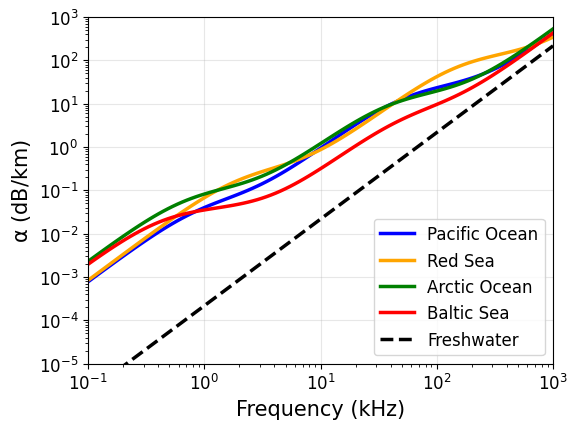

✓ Absorption coefficient validation plot created and saved to: /Users/wangbinb/Library/CloudStorage/OneDrive-UniversityofMissouri/ONR_project/seaEchoTSCalculator/plots/ainslie_mccolm_absorption_validation.pdf


In [4]:
# Create the validation plot - font-safe approach
import matplotlib
matplotlib.rcParams['font.family'] = 'DejaVu Sans'  # Use safe default font
matplotlib.rcParams['mathtext.default'] = 'regular'  # Avoid LaTeX fonts

plt.figure(figsize=(6, 4.5))

# Define colors for each ocean
colors = ['blue', 'orange', 'green', 'red']  # Simple color names

# Plot each ocean condition
oceanic_conditions = ['Pacific Ocean', 'Red Sea', 'Arctic Ocean', 'Baltic Sea']
for idx, ocean_name in enumerate(oceanic_conditions):
    plt.loglog(f, absorption_results[ocean_name], 
               color=colors[idx], linewidth=2.5, label=ocean_name)

# Plot freshwater as dashed reference line
plt.loglog(f, absorption_results['Freshwater'], '--', 
           color='black', linewidth=2.5, label='Freshwater')

# Formatting with safe font settings
plt.xlabel('Frequency (kHz)', fontsize=15)
plt.ylabel(r'$\alpha$ (dB/km)', fontsize=15)  # Proper LaTeX alpha symbol

# Set axis limits with extended y-range
plt.xlim([0.1, 1000])
plt.ylim([1e-5, 1e3])

# Add grid and legend
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12, loc='lower right')

# Save figure to main plots folder
from pathlib import Path

# Get project root correctly for Jupyter notebook
PROJECT_ROOT = Path().resolve().parent  # Go up from validation to main project folder
plots_dir = PROJECT_ROOT / 'plots'
plots_dir.mkdir(exist_ok=True)
plot_path = plots_dir / 'ainslie_mccolm_absorption_validation.pdf'
plt.savefig(plot_path, dpi=300, bbox_inches='tight')

plt.show()

print(f"✓ Absorption coefficient validation plot created and saved to: {plot_path}")